In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import time

## Get the vibration signal features data

In [2]:
features_data = pd.read_csv('C:/Users/intel/Desktop/Mtech_Proj/Digital twin_29 Jan 2021/Low_features_digitalTwin_fault.csv',index_col=0)

In [3]:
features_data.head()

,x_Mean,x_Min,x_Kurtosis,x_Crest_Factor,x_Skewness,x_Form_Factor,fault_Class
0,-0.015542,-0.531908,1.559893,4.469807,-0.080251,-8.142677,C1
1,-0.014872,-0.609838,1.760466,4.377686,-0.269365,-8.633299,C1
2,-0.017018,-0.646336,1.809119,4.169048,-0.063207,-7.533026,C1
3,-0.011631,-0.547362,1.774470,4.277821,-0.079043,-11.263617,C1
4,-0.018077,-0.573010,1.413154,4.211090,-0.098778,-7.016276,C1


# Decision Tree

In [4]:
tree = DecisionTreeClassifier()
X = features_data.drop('fault_Class',axis=1)
y = features_data['fault_Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [5]:
start = time.time()
tree.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")


Training time: 0.062497854232788086s


## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [6]:
y_pred = tree.predict(X_test)

In [7]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

          C1       0.72      0.71      0.72       536
          C2       1.00      1.00      1.00       523
          C3       0.71      0.72      0.72       527
          C4       1.00      1.00      1.00       536
          C5       1.00      1.00      1.00       518

    accuracy                           0.89      2640
   macro avg       0.89      0.89      0.89      2640
weighted avg       0.89      0.89      0.89      2640



[[383   0 153   0   0]
 [  0 523   0   0   0]
 [147   0 380   0   0]
 [  0   0   0 536   0]
 [  0   0   0   0 518]]


# Ramdom Forest Classification

In [8]:
from sklearn.ensemble import  RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import model_selection

In [9]:
rfc = RandomForestClassifier(n_estimators=200)

In [10]:
X = features_data.drop('fault_Class',axis=1)
y = features_data['fault_Class']
# scorer = metrics.get_scorer('roc_auc')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Create a dictionary called param_grid and fill out some parameters for C and gamma.**

In [11]:
param_grid = {'min_samples_leaf': np.linspace(0.01, 0.10, 20)} 

** Create a GridSearchCV object and fit it to the training data.**

In [12]:
grid = GridSearchCV(rfc,param_grid, cv=5,return_train_score=True,refit=True,verbose=2)

start = time.time()
grid.fit(X_train,y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] min_samples_leaf=0.01 ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ min_samples_leaf=0.01, total=   1.0s
[CV] min_samples_leaf=0.01 ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV] ............................ min_samples_leaf=0.01, total=   1.0s
[CV] min_samples_leaf=0.01 ...........................................
[CV] ............................ min_samples_leaf=0.01, total=   1.0s
[CV] min_samples_leaf=0.01 ...........................................
[CV] ............................ min_samples_leaf=0.01, total=   1.0s
[CV] min_samples_leaf=0.01 ...........................................
[CV] ............................ min_samples_leaf=0.01, total=   1.0s
[CV] min_samples_leaf=0.01473684210526316 ............................
[CV] ............. min_samples_leaf=0.01473684210526316, total=   0.9s
[CV] min_samples_leaf=0.01473684210526316 ............................
[CV] ............. min_samples_leaf=0.01473684210526316, total=   0.9s
[CV] min_samples_leaf=0.01473684210526316 ............................
[CV] ............. min_samples_leaf=0.01473684210526316, total=   0.9s
[CV] min_samples_leaf=0.01473684210526316 ............................
[CV] .

[CV] ............. min_samples_leaf=0.06210526315789474, total=   0.8s
[CV] min_samples_leaf=0.0668421052631579 .............................
[CV] .............. min_samples_leaf=0.0668421052631579, total=   0.9s
[CV] min_samples_leaf=0.0668421052631579 .............................
[CV] .............. min_samples_leaf=0.0668421052631579, total=   0.8s
[CV] min_samples_leaf=0.0668421052631579 .............................
[CV] .............. min_samples_leaf=0.0668421052631579, total=   0.8s
[CV] min_samples_leaf=0.0668421052631579 .............................
[CV] .............. min_samples_leaf=0.0668421052631579, total=   0.8s
[CV] min_samples_leaf=0.0668421052631579 .............................
[CV] .............. min_samples_leaf=0.0668421052631579, total=   0.8s
[CV] min_samples_leaf=0.07157894736842106 ............................
[CV] ............. min_samples_leaf=0.07157894736842106, total=   0.7s
[CV] min_samples_leaf=0.07157894736842106 ............................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.6min finished


Training time: 94.4385941028595s


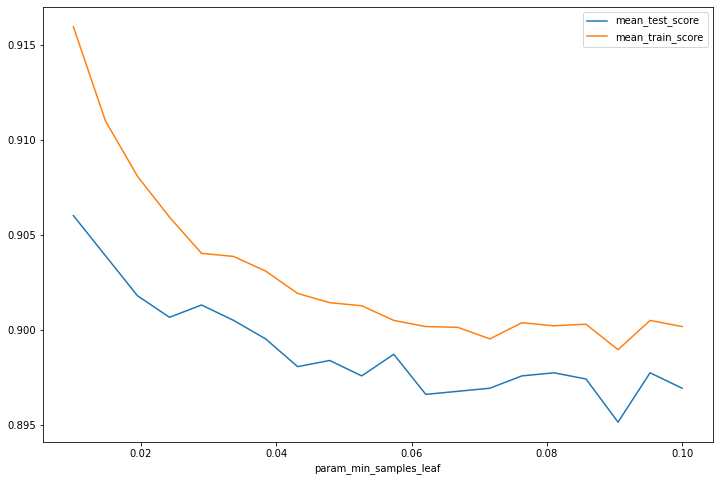

In [13]:
grid = pd.DataFrame(grid.cv_results_)
grid.plot(y=['mean_test_score', 'mean_train_score'], x='param_min_samples_leaf', figsize=(12,8))

In [14]:
rfc = RandomForestClassifier(n_estimators=100, min_samples_leaf=0.04, random_state=1)

start = time.time()
rfc.fit(X_train, y_train)
stop = time.time()
print(f"Training time: {stop - start}s")

print('train score {:2f}'.format(100*rfc.score(X_train, y_train)))
print('test score {:2f}'.format(100*rfc.score(X_test,y_test)))

Training time: 0.4843788146972656s
train score 90.243506
test score 90.946970


In [15]:
sizes = np.linspace(0.10, 1.0, 20)
l = model_selection.learning_curve(rfc, X_train, y_train, train_sizes=sizes, cv=5)

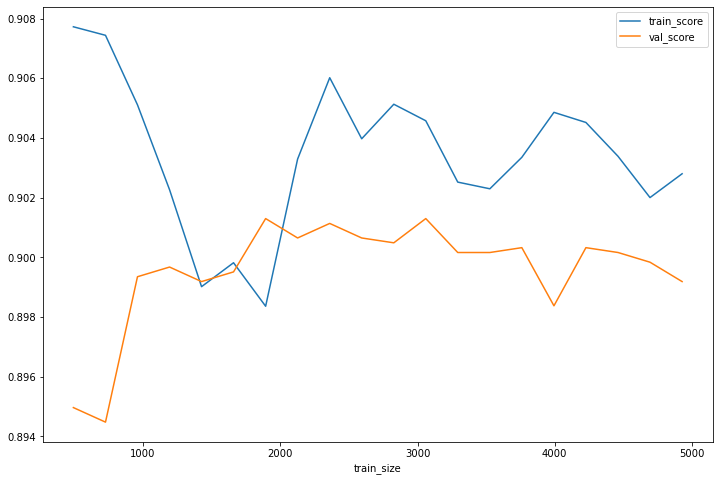

In [16]:
learning = pd.DataFrame({
    'train_size': l[0],
    'train_score': l[1].mean(axis=1),
    'val_score': l[2].mean(axis=1),
})
learning.plot(x='train_size', figsize=(12,8))

In [17]:
rfc_pred = rfc.predict(X_test)

In [18]:
print(classification_report(y_test,rfc_pred))
print('\n')
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

          C1       0.78      0.78      0.78       536
          C2       1.00      1.00      1.00       523
          C3       0.77      0.77      0.77       527
          C4       1.00      1.00      1.00       536
          C5       1.00      1.00      1.00       518

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



[[416   0 120   0   0]
 [  0 523   0   0   0]
 [119   0 408   0   0]
 [  0   0   0 536   0]
 [  0   0   0   0 518]]
